In [1]:
actions = []
images = []

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import time

from gym_pusht.envs import PushTEnv
import gymnasium as gym
import gym_pusht
import numpy as np

env = PushTEnv(obs_type="pixels", render_mode="human", goal_pose="random")
teleop = env.teleop_agent()
obs, info = env.reset()

2025-05-09 14:40:02.848 python[21418:3178160] +[IMKClient subclass]: chose IMKClient_Modern
2025-05-09 14:40:02.848 python[21418:3178160] +[IMKInputSession subclass]: chose IMKInputSession_Modern


In [4]:
step_in_episode = 0
episode_ends = [0]

while True:
    time.sleep(0.1)
    action = teleop.act(obs)

    if action is None:
        env.render()
        continue

    images.append(obs)
    actions.append(action)

    next_obs, reward, terminated, truncated, info = env.step(action)
    env.render()
    obs = next_obs
    step_in_episode += 1

    if terminated or truncated:
        episode_ends.append(episode_ends[-1] + step_in_episode)
        step_in_episode = 0
        obs, _ = env.reset()

KeyboardInterrupt: 

In [21]:
env.close()

In [22]:
img = images[40]

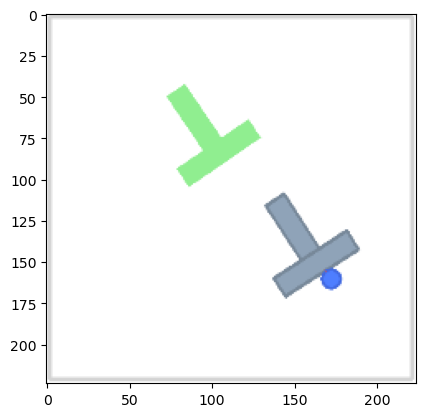

In [23]:
import matplotlib.pyplot as plt

plt.imshow(img)

# Save dataset snapshot

In [25]:
import zarr
import numpy as np

## Prepare file

In [31]:
dataset_version = 1

file_name = f"./data/demonstrations_snapshot_{dataset_version}.zarr"

## Prepare data

In [32]:
actions_np = np.array(actions)
imgs_np = np.array(images)
episode_ends_np = np.array(episode_ends)

In [37]:
file = zarr.open(file_name, mode="w")
data_group = file.create_group("data")

# 1) action
arr_a = data_group.create_array(
    name="action",
    shape=actions_np.shape,
    dtype=actions_np.dtype,
    chunks=actions_np.shape,
)
arr_a[:] = actions_np

# 2) img
arr_i = data_group.create_array(
    name="img",
    shape=imgs_np.shape,
    dtype=imgs_np.dtype,
    chunks=imgs_np.shape,
)
arr_i[:] = imgs_np

# 3) episode_ends
arr_e = file.create_array(
    name="episode_ends",
    shape=episode_ends_np.shape,
    dtype=episode_ends_np.dtype,
    chunks=episode_ends_np.shape,
)
arr_e[:] = episode_ends_np

## Test load

In [40]:
import zarr

ds = zarr.open(f"./data/demonstrations_snapshot_{dataset_version}.zarr", mode="r")

actions      = ds["data"]["action"][:]        # shape (N, 2)
images       = ds["data"]["img"][:]           # shape (N, 96, 96, 3)
episode_ends = ds["episode_ends"][:]          # shape (M,)

print("actions:",      actions.shape, actions.dtype)
print("images:",       images.shape,  images.dtype)
print("episode_ends:", episode_ends.shape, episode_ends.dtype)


actions: (9086, 2) int64
images: (9086, 224, 224, 3) uint8
episode_ends: (54,) int64
